### [E14] 영화 추천하기

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

rating_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/ratings.dat'
ratings_cols = ['user_id', 'movie_id', 'ratings', 'timestamp']
ratings = pd.read_csv(rating_file_path, sep='::', names=ratings_cols, engine='python', encoding = "ISO-8859-1")
orginal_data_size = len(ratings)
ratings.head()

,user_id,movie_id,ratings,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [2]:
stars=3 # 몇개 별점을 3개 이상 준 경우 영화를 좋아한다는 가정을 해보자

lower_3=ratings[ratings['ratings']<stars]
C = ratings[ratings['ratings']>=stars]
print("별점 %d미만인 데이터 개수:"%stars,lower_3.shape[0],"/ 별점 %d이상인 데이터 개수:"%stars, C.shape[0])
print("별점 %d미만인 데이터 비율:"%stars,lower_3.shape[0]/ratings.shape[0],
      "/ 별점 %d이상인 데이터 비율:"%stars, C.shape[0]/ratings.shape[0])

별점 3미만인 데이터 개수: 163731 / 별점 3이상인 데이터 개수: 836478
별점 3미만인 데이터 비율: 0.16369678737143936 / 별점 3이상인 데이터 비율: 0.8363032126285607


- 영화 별점을 3미만 준 경우는 영화를 좋아한다고 보기 어렵다고 생각하기 때문에 3 미만인 데이터를 지우기로 한다.

In [3]:
# 별점 3개 이상인 데이터만 남긴다.
ratings = ratings[ratings['ratings']>=3]
filtered_data_size = len(ratings)

print(f'orginal_data_size: {orginal_data_size}, filtered_data_size: {filtered_data_size}')
print(f'Ratio of Remaining Data is {filtered_data_size / orginal_data_size:.2%}')

orginal_data_size: 1000209, filtered_data_size: 836478
Ratio of Remaining Data is 83.63%


In [4]:
# ratings 컬럼의 이름을 counts로 바꾼다
ratings.rename(columns={'ratings':'counts'}, inplace=True)

In [5]:
# 영화 제목을 보기 위해 메타 데이터를 읽어온다
movie_file_path=os.getenv('HOME') + '/aiffel/recommendata_iu/data/ml-1m/movies.dat'
cols = ['movie_id', 'title', 'genre'] 
movies = pd.read_csv(movie_file_path, sep='::', names=cols, engine='python', encoding='ISO-8859-1')
movies.head()

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies['title'] = movies['title'].str.lower() # 검색을 쉽게 하기 위해서 소문자로 바꾼다.
movies.head(3)

,movie_id,title,genre
0,1,toy story (1995),Animation|Children's|Comedy
1,2,jumanji (1995),Adventure|Children's|Fantasy
2,3,grumpier old men (1995),Comedy|Romance


movie_id를 key, title을 value로 하여서 딕셔너리 형태로 만든다. 그래서 ratings 데이터프레임에 movie_id에 맞춰서 영화 이름을 입력해준다.

In [7]:
movie_dict={id_:mv for id_, mv in zip(movies["movie_id"], movies["title"])}

ratings["title"]=ratings["movie_id"].copy()
ratings["title"]=ratings["title"].map(lambda x: movie_dict[x])

In [8]:
print("유저수:",ratings['user_id'].nunique(), "/ 영화 개수",ratings['movie_id'].nunique())

유저수: 6039 / 영화 개수 3628


In [9]:
# 가장 인기 많은 영화
movie_count = ratings.groupby('title')['user_id'].count()
movie_count.sort_values(ascending=False).head(30)

title
american beauty (1999)                                   3211
star wars: episode iv - a new hope (1977)                2910
star wars: episode v - the empire strikes back (1980)    2885
star wars: episode vi - return of the jedi (1983)        2716
saving private ryan (1998)                               2561
terminator 2: judgment day (1991)                        2509
silence of the lambs, the (1991)                         2498
raiders of the lost ark (1981)                           2473
back to the future (1985)                                2460
matrix, the (1999)                                       2434
jurassic park (1993)                                     2413
sixth sense, the (1999)                                  2385
fargo (1996)                                             2371
braveheart (1995)                                        2314
men in black (1997)                                      2297
schindler's list (1993)                                  2257
pr

### 영화들은 별점을 얼마나 많이 받았을까?
- 아래 그래프와 같이 1000 편이 넘는 영화들이 500개 미만의 별점을 받았고 3000개가 넘는 별점을 받은 영화는 영화 아메리칸 뷰티 하나뿐이다.

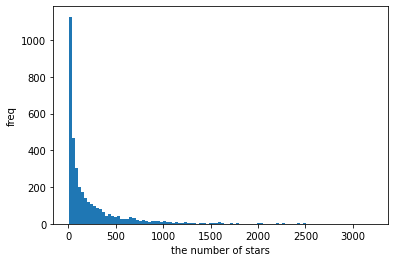

In [10]:
plt.hist(movie_count.tolist(),bins=100)
plt.ylabel("freq")
plt.xlabel("the number of stars")
plt.show()

### 유저들은 별점을 몇개나 남겼을까?

In [11]:
# 유저별 몇개의 영화에 별점 3 이상을 주었는지 통계
user_count = ratings.groupby('user_id')['movie_id'].count()
user_count.describe()

count    6039.000000
mean      138.512668
std       156.241599
min         1.000000
25%        38.000000
50%        81.000000
75%       177.000000
max      1968.000000
Name: movie_id, dtype: float64

대부분의 유저들이 100개 미만 별점을 주었고, 아주 극소수의 사람들이 2천개 가까이 별점을 남겼다

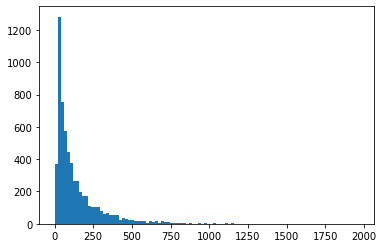

In [12]:
plt.hist(user_count.tolist(), bins=100)
#plt.yscale("log")
plt.show()

In [13]:
# 유저별 별점 중앙값에 대한 통계
user_median = ratings.groupby('user_id')['counts'].median()
user_median.describe() 

count    6039.000000
mean        4.055970
std         0.432143
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: counts, dtype: float64

앞서 별점 3 이상을 준 데이터만 남겼기 때문에 최솟값이 3이다.

In [14]:
ratings.head()

,user_id,movie_id,counts,timestamp,title
0,1,1193,5,978300760,one flew over the cuckoo's nest (1975)
1,1,661,3,978302109,james and the giant peach (1996)
2,1,914,3,978301968,my fair lady (1964)
3,1,3408,4,978300275,erin brockovich (2000)
4,1,2355,5,978824291,"bug's life, a (1998)"


In [15]:
def return_year(x):
    return int(x.split(" ")[-1].replace("(","").replace(")",""))

ratings["year"]=ratings["title"].map(lambda x: return_year(x))

In [16]:
ratings.head()

,user_id,movie_id,counts,timestamp,title,year
0,1,1193,5,978300760,one flew over the cuckoo's nest (1975),1975
1,1,661,3,978302109,james and the giant peach (1996),1996
2,1,914,3,978301968,my fair lady (1964),1964
3,1,3408,4,978300275,erin brockovich (2000),2000
4,1,2355,5,978824291,"bug's life, a (1998)",1998


In [17]:
print(ratings.shape)

(836478, 6)


In [18]:
print("가장 오래된 영화:",ratings["year"].min(),"/ 가장 최신 영화:",ratings["year"].max())

가장 오래된 영화: 1919 / 가장 최신 영화: 2000


### 별점을 가장 많이 남긴 연도

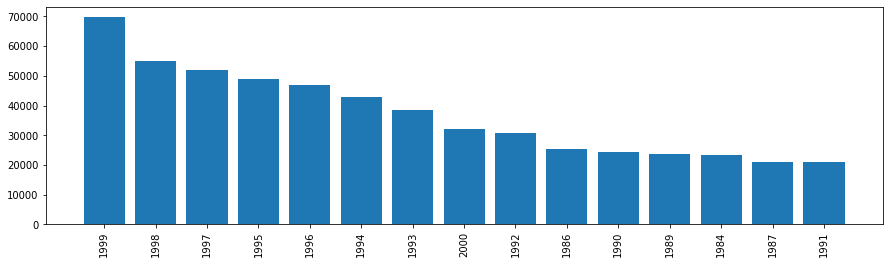

In [19]:

plt.figure(figsize=(15,4))
y=ratings["year"].value_counts()[:15]
plt.bar(list(range(len(y))), y)
plt.xticks(list(range(len(y))), y.index, rotation=90)
plt.show()

사람들이 별 3개 이상을 준 영화들이 개봉한 연도는 위와 같다. 주로 1990년대 전후에 개봉한 영화들의 별점이 많은 것을 알수 있다.

### 모델 검증을 위한 사용자 초기 정보 세팅
- 내가 좋아하는 영화의 리스트를 입력한다.
- 나중에 실제로 내가 좋아하는 영화들을 추천해주는지 체크하기 위해서 입력한다.

In [20]:
# 내가 좋아하는 영화
my_favorite = ["edward scissorhands (1990)","shining, the (1980)",
               "batman (1989)","blue velvet (1986)","william shakespeare's romeo and juliet (1996)",
               'farewell my concubine (1993)' , 'm. butterfly (1993)' ,
               'dancer in the dark (2000)' ,'all about my mother (todo sobre mi madre) (1999)' ,
               'nightmare before christmas, the (1993)',"home alone (1990)"]
movie_id=[2291,1258,592,2076,1059,466,488,3910,3083,551,586]
# 'sunny'이라는 user_id가 위 영화의 별점을 5개씩 줬다고 하자
my_list = pd.DataFrame({'user_id': ['sunny']*len(my_favorite), 
                            'movie_id': movie_id, 
                            'counts':[5]*len(my_favorite), 
                            "title":my_favorite})

if not ratings.isin({'user_id':['sunny']})['user_id'].any():  # user_id에 'zimin'이라는 데이터가 없다면
    ratings = ratings.append(my_list)                           # 위에 임의로 만든 my_favorite 데이터를 추가해 줍니다. 

ratings.reset_index(drop=True, inplace=True)
ratings.tail(14)       # 잘 추가되었는지 확인해 봅시다.

,user_id,movie_id,counts,timestamp,title,year
836475,6040,562,5,956704746.0,welcome to the dollhouse (1995),1995.0
836476,6040,1096,4,956715648.0,sophie's choice (1982),1982.0
836477,6040,1097,4,956715569.0,e.t. the extra-terrestrial (1982),1982.0
836478,sunny,2291,5,NaN,edward scissorhands (1990),NaN
836479,sunny,1258,5,NaN,"shining, the (1980)",NaN
836480,sunny,592,5,NaN,batman (1989),NaN
836481,sunny,2076,5,NaN,blue velvet (1986),NaN
836482,sunny,1059,5,NaN,william shakespeare's romeo and juliet (1996),NaN
836483,sunny,466,5,NaN,farewell my concubine (1993),NaN
836484,sunny,488,5,NaN,m. butterfly (1993),NaN


### 모델 활용하기 위한 전처리

- 인덱싱

In [21]:
print(ratings['user_id'].nunique(),ratings['movie_id'].nunique())

6040 3628


In [22]:
# 고유한 유저, 아티스트를 찾아내는 코드
user_unique = ratings['user_id'].unique()
movie_unique = ratings['title'].unique()

# 유저, 영화 indexing 하는 코드 idx는 index의 약자
user_to_idx = {v:k for k,v in enumerate(user_unique)}
movie_to_idx = {v:k for k,v in enumerate(movie_unique)}

#movie_to_idx 를 뒤집어, index로부터 movie 이름을 얻는 dict를 생성합니다. 
idx_to_movie = {v:k for k,v in movie_to_idx.items()}


In [23]:
print(user_to_idx['sunny'])    # 6039명의 유저 중에서 가장 마지막에 추가했으므로 6039이어야한다 
print(movie_to_idx['nightmare before christmas, the (1993)'])       

6039
284


In [24]:
# indexing을 통해 데이터 컬럼 내 값을 바꾸는 코드

# user_to_idx.get을 통해 user_id 컬럼의 모든 값을 인덱싱한 Series를 구해 봅시다. 
# 혹시 정상적으로 인덱싱되지 않은 row가 있다면 인덱스가 NaN이 될 테니 dropna()로 제거합니다. 
temp_user_data = ratings['user_id'].map(user_to_idx.get).dropna()
if len(temp_user_data) == len(ratings):   # 모든 row가 정상적으로 인덱싱되었다면
    print('user_id column indexing OK!!')
    ratings['user_id'] = temp_user_data   # ratings['user_id']을 인덱싱된 Series로 교체해 줍니다. 
else:
    print('user_id column indexing Fail!!')

# movie_to_idx을 통해 movie_id 컬럼도 동일한 방식으로 인덱싱해 줍니다. 
temp_movie_data = ratings['title'].map(movie_to_idx.get).dropna()
if len(temp_movie_data) == len(ratings):
    print('movie_id column indexing OK!!')
    ratings['title'] = temp_movie_data
else:
    print('movie_id column indexing Fail!!')

ratings

user_id column indexing OK!!
movie_id column indexing OK!!


,user_id,movie_id,counts,timestamp,title,year
0,0,1193,5,978300760.0,0,1975.0
1,0,661,3,978302109.0,1,1996.0
2,0,914,3,978301968.0,2,1964.0
3,0,3408,4,978300275.0,3,2000.0
4,0,2355,5,978824291.0,4,1998.0
...,...,...,...,...,...,...
836484,6039,488,5,NaN,2658,NaN
836485,6039,3910,5,NaN,1852,NaN
836486,6039,3083,5,NaN,237,NaN
836487,6039,551,5,NaN,284,NaN


## 암묵적 평가와 명시적 평가
- 명시적 (explicit) 평가: 좋아요, 별점
- 암묵적 (implicit) 평가: 사용자가 아티스트의 곡을 몇번 플레이 했느냐. 검색, 구매 내역 등등

## Matrix Factorization(MF)
- 우리는 u명의 사용자들이 i명의 아티스트의 선호도를 나타내는 __(u,i) 사이즈의 평가 행렬 R (Rating Matrix)__ 을 만들 것이다. 

- __협업필터링(collaborative filltering)이란 평가행렬R__ 을 전재로 만들어진다.

![](https://www.researchgate.net/profile/Huu-Hoa-Nguyen/publication/314071424/figure/fig1/AS:570666408529920@1513068882014/An-example-of-matrix-factorization.png)


u x i 사이즈의  행렬을 (u,K) 사이즈인 $w_{1}$ 행렬과 (K,i)사이즈인 $w_{2}$ 행렬로 분해할수 있고 대체로 K는 u나 i보다 작기 때문에 더 빠르게 연산할 수 있다.
- 모델의 목표는 모든 유저와 아이템에 대해서 K-dimension의 벡터를 잘 만드는 것이다.

 
- __희소행렬(sparse matrix)__ 를 표현하는 방법으로 COO(Coordinate list), CSC(Compressed Sparse Column)  
>COO(Coordinate list)- 튜플목록으로 (행,열,값) 매트릭스를 저장  
>CSR(Compressed Sparse Row)  
>CSC(Compressed Sparse Column)  

- 유저와 아이템에 대한 매트릭스는 0이 매우 많은 sparse한 매트릭스이다. 이런 sparse한 매트릭스는 메모리 용량을 매우 많이 사용하는 매트릭스이기 때문에 위에서 적은 COO, CSC,CSR 중에서 CSR 매트릭스로 변환을 해서 연산을 한다.

## CSR(Compressed Sparse Row) Matrix


![](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FzoCFW%2FbtqSQ4PhNru%2F3KT7ICijhKubcqKH0SeHUk%2Fimg.png)



- 데이터(data, A)는 $A_{IJ}$의 0이 아닌 숫자를 행 순서로 배열에 담은 것
- 열 인덱스 값(indices, JA)는 데이터(A)의 데이터의 열 인덱스 배열을 담은 것
- 행 압축 정보(indptr, IA)는 각 열의 첫번째로 0이 아닌 값이 배열 A와 배열 JA에 몇번 째 인덱스에 있는지 입력한다. 그리고 맨 마지막에는 배열 A, JA의 길이가 어떻게 되는지 입력한다.

### CSR matrix 만들기

- 6040 x 3628 의 희소행렬(sparse matrix)를 CSR matrix로 만들었다.

In [25]:
from scipy.sparse import csr_matrix

num_user = ratings['user_id'].nunique()
num_movie = ratings['title'].nunique()

csr_data = csr_matrix((ratings.counts, (ratings.user_id, ratings.title)), shape= (num_user, num_movie))
csr_data

<6040x3628 sparse matrix of type '<class 'numpy.int64'>'
	with 836489 stored elements in Compressed Sparse Row format>

In [26]:
print("csr_data의 데이터 길이:",csr_data.data.shape ,"/", csr_data.data)
print("csr_data의 indices 길이:",csr_data.indices.shape ,"/", csr_data.indices)
print("csr_data의 indptr 길이:",csr_data.indptr.shape , "/",csr_data.indptr)

csr_data의 데이터 길이: (836489,) / [5 3 3 ... 5 5 5]
csr_data의 indices 길이: (836489,) / [   0    1    2 ...  993 1852 2658]
csr_data의 indptr 길이: (6041,) / [     0     53    169 ... 836202 836478 836489]


컬럼의 개수는 사용자의 수이다. 1개 이상의 영화에 별점 3 이상 사용자만 ratings 데이터 프레임에 있으므로, csr_data의 __indptr의 모양은 6041__ 이다. indptr의 마지막 값 836483은 csr\_data.data와 csr\_indices의 길이이다. 

In [27]:
print("사용자(user)의 수:",num_user,"/ 영화의 수:" ,num_movie)

사용자(user)의 수: 6040 / 영화의 수: 3628


모델이 잘 만들어졌는지 체크하기 위해서 마지막으로 내가 입력했던 영화는 다음과 같다.   

"shining, the (1980)"   
"batman (1989)"   
"blue velvet (1986)"   
"william shakespeare's romeo and juliet (1996)",   
'farewell my concubine (1993)'    
'm. butterfly (1993)'   
'dancer in the dark (2000)'   
'all about my mother (todo sobre mi madre) (1999)'   
'nightmare before christmas, the (1993)'   
"home alone (1990)"

csr_data.indices의 마지막 10개가 이 영화들이고 각각 별점을 5개씩 줬다. 동일하게 출력이 된다면 제대로 만들어진 것으로 보아도 될것 같다.

In [28]:
for i in csr_data.indices[-10:]:
    print(idx_to_movie[i])

edward scissorhands (1990)
nightmare before christmas, the (1993)
william shakespeare's romeo and juliet (1996)
home alone (1990)
batman (1989)
blue velvet (1986)
farewell my concubine (1993)
shining, the (1980)
dancer in the dark (2000)
m. butterfly (1993)


In [29]:
csr_data.data[-10:]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

### csr matrix는 제대로 만들어졌다

##  MF 모델 학습하기

[Implicit 라이브러리 출처| benfred의 github](https://github.com/benfred/implicit)   
[Implicit 라이브러리의 튜토리얼](https://benfred.github.io/implicit/api/models/cpu/als.html)

In [30]:
from implicit.als import AlternatingLeastSquares
import os
import numpy as np


os.environ['OPENBLAS_NUM_THREADS']='1'
os.environ['KMP_DUPLICATE_LIB_OK']='True'
os.environ['MKL_NUM_THREADS']='1'

In [31]:
# Implicit AlternatingLeastSquares 모델의 선언
als_model = AlternatingLeastSquares(factors=100, # 유저와 아이템의 벡터를 몇 차원
                                    regularization=0.01, # 과적합 방지를 위해 regularization
                                    use_gpu=False,  # GPU 사용할지
                                    iterations=50,  # 데이터를 몇번 반복해서 학습할지...
                                    dtype=np.float32,
                                   random_state=42)

In [32]:
# als 모델은 input으로 (item X user 꼴의 matrix를 받기 때문에 Transpose한다.)
csr_data_transpose = csr_data.T
csr_data_transpose

<3628x6040 sparse matrix of type '<class 'numpy.int64'>'
	with 836489 stored elements in Compressed Sparse Column format>

In [33]:
# 모델 훈련
als_model.fit(csr_data_transpose) 

  0%|          | 0/50 [00:00<?, ?it/s]

### 내가 만든 영화 리스트 sunny와 그 영화 리스트 중에 있는 크리스마스의 악몽(nightmare before christmas)를 내적해보자.

In [34]:
sunny, nightmare = user_to_idx['sunny'], movie_to_idx['nightmare before christmas, the (1993)']
sunny_vector, nightmare_vector = als_model.user_factors[sunny], als_model.item_factors[nightmare]
# sunny과 nightmare를 내적하는 코드
np.dot(sunny_vector, nightmare_vector)

0.5267762

나의 영화 리스트에 있는 영화 사이의 내적을 계산해보니까 0.53 정도이다. 나의 리스트 안에 있는 영화니까 1에 더 가까워야 하지 않았나 생각을 했는데 생각보다 낮아서 원인을 생각해보았다.   

1. 우선 내가 좋아하는 영화 리스트를 너무 적게 입력했을까?(10개)
2. 내 영화 리스트가 일관성이 없어서 내적이 낮게 나온 것은 아닐까?
2. 튜닝을 하는 것이 필요한 것은 아닐까?

일단 튜닝을 하기에 앞서 나의 영화 리스트 내의 모든 영화들과 나의 리스트 사이의 내적을 구해보자

In [35]:
basic_score=[]
for i in my_favorite:
    sunny, mf = user_to_idx['sunny'], movie_to_idx[i]
    sunny_vector, mf_vector = als_model.user_factors[sunny], als_model.item_factors[mf]
    # sunny과 nightmare를 내적하는 코드
    basic_score.append(np.dot(sunny_vector, mf_vector))

In [52]:
pd.DataFrame({"movie":my_favorite,"score":basic_score})

,movie,score
0,edward scissorhands (1990),0.615061
1,"shining, the (1980)",0.353539
2,batman (1989),0.411378
3,blue velvet (1986),0.430347
4,william shakespeare's romeo and juliet (1996),0.308349
5,farewell my concubine (1993),0.302303
6,m. butterfly (1993),0.066774
7,dancer in the dark (2000),0.330804
8,all about my mother (todo sobre mi madre) (1999),0.314135
9,"nightmare before christmas, the (1993)",0.526776


__크리스마스의 악몽(nightmare before christmas, the (1993))이  0.53은 높은 편에 속한 것을 알수 있다. 아마도 가위손(0.62), 배트맨(0.41), 크리스마스의 악몽(0.53)은 같은 팀 버튼 감독의 영화__ 라서 나의 영화리스트 전체와 내적이 높은 편에 속한 것이 아닐까 생각하게 되었다. 하지만 0.53은 너무 낮다는 판단이 들었다.

- 일단 그리드 서치 튜닝을 시도해보았다

In [36]:
def train(factors, regularization,iters):
    als_model = AlternatingLeastSquares(factors=factors,               # 유저와 아이템의 벡터를 몇 차원
                                        regularization=regularization, # 과적합 방지를 위해 regularization
                                        use_gpu=False,                # GPU 사용할지
                                        iterations=iters,             # 데이터를 몇번 반복해서 학습할지...
                                        dtype=np.float32,random_state=42)
    # 모델 훈련
    als_model.fit(csr_data_transpose) 
    return als_model

In [37]:
fac=[i*10 for i in range(10,50,10)] # factors
reg=[i*0.01 for i in range(1,10,5)] # regularization
iters=[10*i for i in range(10,16,3)] #  iterations

hyper={} 
# 시도한 하이퍼 파라미터와 나의 영화리스트 벡터와 크리스마스의 악몽(내 리스트 안에 있는 영화)의 내적 저장

for f in fac:
    for r in reg:
        for it in iters:
            als_model=train(f,r,it)
            sunny, nightmare = user_to_idx['sunny'], movie_to_idx['nightmare before christmas, the (1993)']
            sunny_vector, nightmare_vector = als_model.user_factors[sunny], als_model.item_factors[nightmare]
            hyper["%d-%f-%d"%(f,r,it)] = np.dot(sunny_vector, nightmare_vector)
    print(f,"-------------------------------------------------------------------------------------------------------")

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

100 -------------------------------------------------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

200 -------------------------------------------------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

300 -------------------------------------------------------------------------------------------------------


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/130 [00:00<?, ?it/s]

400 -------------------------------------------------------------------------------------------------------


In [38]:
hyper  # factor-regularization-iteration: 크리스마스 악몽 영화의 벡터와 내 영화 리스트의 벡터의 내적

{'100-0.010000-100': 0.52207214,
 '100-0.010000-130': 0.52060413,
 '100-0.060000-100': 0.5231734,
 '100-0.060000-130': 0.52172613,
 '200-0.010000-100': 0.7148032,
 '200-0.010000-130': 0.70696115,
 '200-0.060000-100': 0.7129584,
 '200-0.060000-130': 0.7025259,
 '300-0.010000-100': 0.81454664,
 '300-0.010000-130': 0.815404,
 '300-0.060000-100': 0.80731016,
 '300-0.060000-130': 0.8032144,
 '400-0.010000-100': 0.854094,
 '400-0.010000-130': 0.85200286,
 '400-0.060000-100': 0.85167235,
 '400-0.060000-130': 0.8508632}

- factors를 400, iteration은 100, regularization 은 0.01로 했을때 0.854로 가장 좋게 나왔다. 이 하이퍼파라미터로 훈련을 시킨 모델을 사용해서 영화 추천을 해보자

In [39]:
als_model=train(400,0.01,100)
sunny, nightmare = user_to_idx['sunny'], movie_to_idx['nightmare before christmas, the (1993)']
sunny_vector, nightmare_vector = als_model.user_factors[sunny], als_model.item_factors[nightmare]

  0%|          | 0/100 [00:00<?, ?it/s]

In [40]:
np.dot(sunny_vector, nightmare_vector) 

0.854094

In [41]:
score=[]
for i in my_favorite:
    sunny, mf = user_to_idx['sunny'], movie_to_idx[i]
    sunny_vector, mf_vector = als_model.user_factors[sunny], als_model.item_factors[mf]
    # sunny과 nightmare를 내적하는 코드
    score.append(np.dot(sunny_vector, mf_vector))

In [42]:
df=pd.DataFrame({"movie":my_favorite, 
                 "기본모델 내적":basic_score,
                "튜닝한 모델 내적":score})
df

,movie,기본모델 내적,튜닝한 모델 내적
0,edward scissorhands (1990),0.615061,0.893251
1,"shining, the (1980)",0.353539,0.791769
2,batman (1989),0.411378,0.723956
3,blue velvet (1986),0.430347,0.671934
4,william shakespeare's romeo and juliet (1996),0.308349,0.711056
5,farewell my concubine (1993),0.302303,0.544065
6,m. butterfly (1993),0.066774,0.210283
7,dancer in the dark (2000),0.330804,0.493414
8,all about my mother (todo sobre mi madre) (1999),0.314135,0.631616
9,"nightmare before christmas, the (1993)",0.526776,0.854094


- 모델을 튜닝하기 전보다 나의 영화 리스트 전반과 각 영화의 내적이 가까운 영화의 리스트가 늘어난 것을 보아서 모델의 학습이 잘 되었던 것 같다. 다만 영화 m.butterfly의 경우는 다른 영화들과 다른 성격을 띄는 면이 있어서 많이 개선된 모델임에도 불구하고 내적값이 0.2에 불과한 것을 알수 있다.

### 비슷한 영화 찾기
- 내가 좋아하는 영화 중에서 나의 어머니의 모든 것(all about my mother (todo sobre mi madre) (1999))와 유사한 영화를 찾아보고자 한다.

In [43]:
movies.loc[movies["title"].str.contains("all about my mother")]

,movie_id,title,genre
3014,3083,all about my mother (todo sobre mi madre) (1999),Comedy|Drama


In [44]:
def get_similar_movie(movie_name: str): # 함수로 만듦
    m_id = movie_to_idx[movie_name]
    similar_mov = als_model.similar_items(m_id)
    similar_mov = [(idx_to_movie[i[0]], i[1]) for i in similar_mov]
    return similar_mov


In [45]:
#  좋아하는 영화와 비슷한 영화인지 확인
get_similar_movie('all about my mother (todo sobre mi madre) (1999)') 

[('all about my mother (todo sobre mi madre) (1999)', 1.0000001),
 ('live flesh (1997)', 0.35894528),
 ('my life in pink (ma vie en rose) (1997)', 0.3368531),
 ('holy smoke (1999)', 0.31430978),
 ('urbania (2000)', 0.31202692),
 ('mifune (mifunes sidste sang) (1999)', 0.30807194),
 ('steam: the turkish bath (hamam) (1997)', 0.30709338),
 ('central station (central do brasil) (1998)', 0.306385),
 ('beautiful people (1999)', 0.305403),
 ("isn't she great? (2000)", 0.30227178)]

영화 all about my mother(내 어머니의 모든 것)는 __페드로 알모도바르 감독__ 의 영화로 __아들을 잃은 어머니__ 가 __여장남자가 된 전 남편__ 을 찾아 떠나서 아들의 죽음을 이야기하고 과거와 화해하는 영화이다. 
- live flesh는 페드로 알모도바르 감독의 영화로 같은 감독의 영화라서 유사도가 높다고 판단 된 것 같다.
- my life in pink는 자신을 여성으로 생각하는 남자아이의 이야기이라서 유사도가 높다고 뽑힌 것으로 생각이 된다.
- holy smoke는 모성애에 관한 이야기라서 유사도가 높다고 계산이 된 것으로 생각이 된다.

__영화의 감독에 대한 정보와 영화 내용에 대한 내용을 전혀 포함하고 있지 않은 데이터를 통해서 배우 유사한 영화__ 를 찾았다.

### 유저에게 추천하기
- AlternatingLeastSquares 클래스의 recommend 메서드를 통해 좋아할만한 아이템 추천 받는다.

In [46]:
user = user_to_idx['sunny']
# recommend에서는 user*item CSR Matrix를 받는다
mov_recommended = als_model.recommend(user, 
                                         csr_data, 
                                         N=20, 
                                         filter_already_liked_items=True,# 이미 평가한 아이템은 제외
                                        )

[idx_to_movie[i[0]] for i in mov_recommended]

['raise the red lantern (1991)',
 'brazil (1985)',
 'truman show, the (1998)',
 'ed wood (1994)',
 'back to the future part iii (1990)',
 'sliding doors (1998)',
 'killing fields, the (1984)',
 'elephant man, the (1980)',
 'raising arizona (1987)',
 'heathers (1989)',
 'batman returns (1992)',
 'poltergeist (1982)',
 'bridge on the river kwai, the (1957)',
 'graduate, the (1967)',
 'basic instinct (1992)',
 'great expectations (1998)',
 'blues brothers, the (1980)',
 'postino, il (the postman) (1994)',
 'requiem for a dream (2000)',
 'waiting for guffman (1996)']

모두 좋아하는 영화는 아니지만 __영화 에드우드(ed wood)와 트루맨쇼(truman show), 배트맨 리턴즈(batman returns), 일포스티노(postino il)__ 를 실제로 좋아한다. 일단 유저 추천영화 리스트에 내가 좋아하는 영화가 포함이 되어있어서 다른 영화 리스트도 신뢰하고 볼 것 같다고 생각했다.

 아마도 내 영화 리스트에 __가위손, 크리스마스의 악몽 등 팀 버튼 감독의 영화를 포함하기 때문에 영화 에드우드와 배트맨 리턴즈를 추천__ 한 것이 아닐까 추측해보았다. 다만 __영화 일 포스티노는 내가 좋아하긴 하지만 칠레의 시인 파블로 네루다를 주인공으로 다룬 정치배경에서 시를 쓰는 것에 관해서 다룬 영화인데__ 추천이 되어서 신기했다. 그래서 추천하는데 기여도가 된 것이 무엇인지 봐야겠다.

### 영화 일 포스티노를 추천하는데 기여한 영화는?
[AlternatingLeastSquares 코드](https://github.com/benfred/implicit/blob/4dba6dd90c4a470cb25ede34a930c56558ef10b2/implicit/als.py#L363)

In [47]:
mv = movie_to_idx["postino, il (the postman) (1994)"]
explain = als_model.explain(user,          # 추천에 기여한 정도를 확인 할수 있는 메서드
                            csr_data, 
                            itemid=mv)

In [48]:
explain[0]  # 내 영화 리스트와 영화 일 포스티노의 점수

0.20301263676717335

In [49]:
# 유저와 아이템 추천하는데 기여한 아이템과 스코어 top 10, 기본값이 10

[(idx_to_movie[i[0]], i[1]) for i in explain[1]] 

[('edward scissorhands (1990)', 0.06691559287394665),
 ('farewell my concubine (1993)', 0.06175094785370262),
 ('all about my mother (todo sobre mi madre) (1999)', 0.04169489409290532),
 ('shining, the (1980)', 0.03760938836959725),
 ('home alone (1990)', 0.019794215917382597),
 ('batman (1989)', 0.015219091672061362),
 ('blue velvet (1986)', 0.011817575050663536),
 ('nightmare before christmas, the (1993)', 0.0037208206623173985),
 ('m. butterfly (1993)', -0.006700532302585946),
 ("william shakespeare's romeo and juliet (1996)", -0.01684220977400986)]

내가 좋아하는 영화들의 벡터와 영화 일 포스티노 벡터의 내적이다. 일포스티노와 내가 좋아하는 영화들 사이의 내적이 0에 가깝다. 즉 별로 상관이 없는 것으로 보여졌다. 영화의 내용상 크게 유사하다고는 느끼지 못했지만 __팀 버튼, 천카이거(패왕별희, farewell my concubine)등 관객들이 영화를 선택하는데 있어서 감독이 중요한 기준이 되는__ 영화라는 공통점이 있는 영화가 높은 스코어를 갖는다는 인상이 들었다.(소위 영화제에서 상을 많이 받는 감독들)

그래서 이번엔 추천 순위 3위인 트루먼쇼(truman show)를 살펴보기로 했다.

In [59]:
movies.loc[movies["title"].str.contains("truman show, the")]

,movie_id,title,genre
1636,1682,"truman show, the (1998)",Drama


In [60]:
mv = movie_to_idx["truman show, the (1998)"]
explain = als_model.explain(user,          # 추천에 기여한 정도를 확인 할수 있는 메서드
                            csr_data, 
                            itemid=mv)

In [61]:
explain[0]  # 트루먼쇼 

0.269357733602354

In [62]:
# 유저와 아이템 추천하는데 기여한 아이템과 스코어 top 10, 기본값이 10
[(idx_to_movie[i[0]], i[1]) for i in explain[1]] 

[('home alone (1990)', 0.07118260269425239),
 ('blue velvet (1986)', 0.04275436350535426),
 ('farewell my concubine (1993)', 0.03611319170109289),
 ('nightmare before christmas, the (1993)', 0.032947291661650877),
 ('batman (1989)', 0.025442990850055712),
 ('edward scissorhands (1990)', 0.023624148612510446),
 ('dancer in the dark (2000)', 0.015970635374689474),
 ('shining, the (1980)', 0.01529352094372753),
 ('all about my mother (todo sobre mi madre) (1999)', 0.005836022840272747),
 ('m. butterfly (1993)', 0.0006312076192964682)]

일단 트루먼쇼와 기여도는 일 포스티노에 비해 전반적으로 0.01정도 내 영화 리스트의 영화들과 유사도가 높은 것으로 보인다.   
 
다만 __트루먼쇼를 추천하는데 기여한 영화가 나홀로 집에(home alone), 블루 벨벳(blue velet), 패왕별희(farewell my concubine)이 특이했다. 정말 딱히 공통점이 보이지 않아서 특이했었다. 더 특이한 점은 내가 실제로 정말 재밌게 봤던 영화가 트루먼쇼 였다는 점이다.__

## 회고

- 이론상으로는 두 벡터 사이의 내적이 1에 가까우면 매우 유사한 벡터이고, 0에 가까우면 서로 독립적인 벡터이며, -1이면 서로 반대되는 벡터라고 들었다. 하지만 추천시스템에서는 인간의 구매 혹은 행동패턴을 벡터로 만들어서 계산하기 때문에 절대적인 수치는 참고가 되지만 상대적으로 생각해야하겠다는 생각을 들었다.

- 사실 추천 시스템을 만드는데 있어서 그냥 내 주관대로 모델의 성능을 파악해도 괜찮은 것인가 생각이 들었다. 내가 좋아하는 영화의 리스트의 영화들과 내적이 큰 영화의 벡터의 내적값이 최대한 1에 가깝도록 튜닝을 하여서 만들었지만 이건 나의 주관적인 리스트이기 때문에 완전히 신뢰하기는 힘들다고 생각했다. 

- 재밌는 것이 추천시스템의 알고리즘에 대해서는 넷플릭스에서 사용하는 알고리즘 등이 많이 알려져 있었다. 반면 cross validation을 하고 모델을 어떻게 평가를 하는지에 대해서는 내용이 적었다. 그래서 최대한 합리적인 방법으로 추천 시스템 모델을 평가하는 기준을 고민해봐야겠다는 생각을 하였다.

- 마지막에 나의 영화리스트를 기준으로 유저인 나에게 추천하는 영화 리스트를 보고 내가 적은 영화의 내용과 일치하는 것이 없음에도 불구하고 __트루먼쇼와 일 포스티노__ 를 추천한 것이 신기했다. 사실 __일 포스티노는 영화광들 사이에서 좋아하는 영화__ 였기에 그러려니 했었는데 __트루먼쇼__ 는 사실 좀 특이한 영화이지만 나의 영화 리스트와는 상관이 없다고 생각했는데 추천이 되어서 신기했었다.

- 아마도 __Matrix Factorization 추천 시스템__ 이 __Contents Based Filtering 추천 시스템__ 에 비해서 더 성능이 까닭이 이런 경우가 아닐까 생각이 들었다. 장르나 감독,영화의 소재등으로 나누어지지 않는 사람들의 행동패턴의 특징을 잡아내어서 계산해내기 때문에 계산이 좋았던게 아닐까 생각이 들었다.

- movielens 데이터셋이 __추천 시스템__ 에서 가장 기본적이고 유명한 데이터셋으로 알려져있고 추천시스템을 만들어보는데 아주 좋은 데이터셋이라고 느껴지지만 대부분 20세기의 영화 중심으로 이루어진 데이터라서 다소 아쉬웠다. 예전에 영화를 좋아하던 시절에 영화를 일부러 오래된 영화들을 찾아다녔던 기억이 있어서 그때 봤던 1990년대의 영화 리스트 중에서 내가 좋아했던 영화들을 찾아내면서 리스트를 만들었다. 아마 2000년대에 태어난 사람들의 경우는 좋아하는 영화 리스트를 만드는 것도 쉽지 않겠다는 생각이 들었다. 굳이 영화가 아니더라도 21세기에 공유가 되고 추천시스템을 학습가능한 데이터셋을 캐글 등에서 좀 더 찾아보고 연습을 해봐야겠다는 생각을 했다.